# Lab - Decision Tree, Knn, and K-means 

<참조> 머신러닝 교과서 with 파이썬, 시이킥런, 텐서플로

# 과제 - 연습문제 
## Breast cancer wisconsin (diagnostic) dataset 이용 

```
==== ===================================== ====== ======
idx                                         Min    Max
==== ===================================== ====== ======
 0   radius (mean):                        6.981  28.11
 1   texture (mean):                       9.71   39.28
 2   perimeter (mean):                     43.79  188.5
 3   area (mean):                          143.5  2501.0
 4   smoothness (mean):                    0.053  0.163
 5   compactness (mean):                   0.019  0.345
 6   concavity (mean):                     0.0    0.427
 7   concave points (mean):                0.0    0.201
 8   symmetry (mean):                      0.106  0.304
 9   fractal dimension (mean):             0.05   0.097
 10  radius (standard error):              0.112  2.873
 11  texture (standard error):             0.36   4.885
 12  perimeter (standard error):           0.757  21.98
 13  area (standard error):                6.802  542.2
 14  smoothness (standard error):          0.002  0.031
 15  compactness (standard error):         0.002  0.135
 16  concavity (standard error):           0.0    0.396
 17  concave points (standard error):      0.0    0.053
 18  symmetry (standard error):            0.008  0.079
 19  fractal dimension (standard error):   0.001  0.03
 20  radius (worst):                       7.93   36.04
 21  texture (worst):                      12.02  49.54
 22  perimeter (worst):                    50.41  251.2
 23  area (worst):                         185.2  4254.0
 24  smoothness (worst):                   0.071  0.223
 25  compactness (worst):                  0.027  1.058
 26  concavity (worst):                    0.0    1.252
 27  concave points (worst):               0.0    0.291
 28  symmetry (worst):                     0.156  0.664
 29  fractal dimension (worst):            0.055  0.208
==== ===================================== ====== ======
```

In [3]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

## 로지스틱 회귀 문제.

### 유방암의 진단을 가장 구별하는 가장 좋은 특성 set (feature set)를 찾으라. 

#### 요구사항
1. 데이터의 특성 3-4를 골라서 하나의 특성집합으로 만들자.  최소 3개의 그룹을 만들어서 로지스틱 회귀를 통해서 가장 진단을 잘하는 그룹을 찾아라.   특성 그룹의 예 - (mean radius' 'mean texture' 'mean perimeter'), ('mean radius', 'mean symmetry' , 'fractal dimension error'), ('worst concave points' 'worst symmetry' 'worst fractal dimension') 
2. 3개 이상의 그룹을 만들어도 좋다.    
3. 특성은 중복될 수 있다.
4. 훈련집합과 테스팅 집합의 비율은 임의로 정하되, 반드시 테스팅 집합의 결과를 출력하라. 
5. 결과는 plot_decision_regions() 함수를 이용하되, 특성집합에서 2가지의 특성만을 골라서 x, y 축으로 하여 출력하라. 
6. 도전 - 가장 정확한 특성집합을 찾는다. 집합의 특성 수를 최소, 정확도는 가장 높게... 


In [53]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from IPython.display import Image

import numpy as np

bc = datasets.load_breast_cancer()

# print(bc.data)
# print(bc.target)
# print(bc.target_names[1])
# print(bc.DESCR)
# print(bc.feature_names)
# print(bc.feature_names[20:23])
# print(bc.filename)

['worst radius' 'worst texture' 'worst perimeter']


In [18]:
def LR(X, y, displot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    
    ppn = Perceptron(max_iter=40, eta0=0.1, tol=1e-3, random_state=1)
    ppn.fit(X_train_std, y_train)  # Train 
    y_pred = ppn.predict(X_test_std)

    print("TESTED: {} FAILED: {}".format(len(y_test), (y_test != y_pred).sum()))
    print("ACCU: %.2f" % accuracy_score(y_test, y_pred))
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    
    lr = LogisticRegression(solver='liblinear', multi_class='auto', C=100.0, random_state=1)
    lr.fit(X_train_std, y_train)
    

    if displot:
        plot_decision_regions(X=X_combined_std, y=y_combined, classifier=lr, test_idx=range(105,150))
        plt.xlabel('')
        plt.ylabel('')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
        print()
    
#     return [X_combined_std, y_combined]

### 테스팅 집합:
```
['mean radius' 'mean texture' 'mean perimeter']
['radius error' 'texture error' 'perimeter error']
['worst radius' 'worst texture' 'worst perimeter']
```

In [19]:
# X = bc.data[:, [2, 3, 4]]
# y = bc.target

LR(bc.data[:, [0,1,2]], bc.target)
LR(bc.data[:, [10,11,12]], bc.target)
LR(bc.data[:, [20,21,22]], bc.target)

TESTED: 171 FAILED: 29
ACCU: 0.83
TESTED: 171 FAILED: 39
ACCU: 0.77
TESTED: 171 FAILED: 11
ACCU: 0.94


TESTED: 171 FAILED: 25
ACCU: 0.85


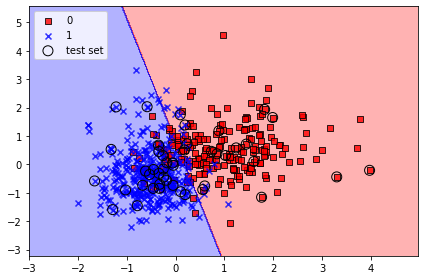


TESTED: 171 FAILED: 26
ACCU: 0.85


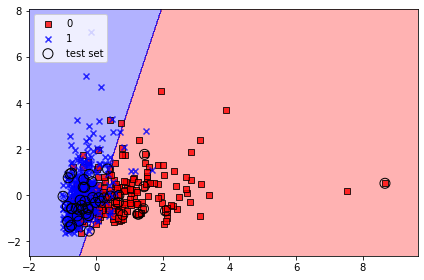


TESTED: 171 FAILED: 9
ACCU: 0.95


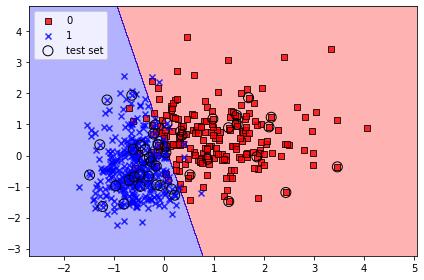

In [20]:
LR(bc.data[:, [0,1]], bc.target, True)
LR(bc.data[:, [10,11]], bc.target, True)
LR(bc.data[:, [20,21]], bc.target, True)

## Decision Tree 문제 
### 유방암을 진단하는 DT를 만들어보자 
#### 요구사항
1. 주어진 데이터를 사용하여 유방암의 종류를 판별하는 DT를 개발하라. 
2. DT의 깊이는 임의로 정하되, 가장 정확성이 좋은 수 있도록 선택하라.
3. 앞에서 설계한 로지스틱 회귀 문제와 비교하여 성능을 판단해보라.
5. 훈련집합과 테스팅 집합의 비율은 임의로 정하되, 반드시 테스팅 집합의 결과를 출력하라. 
6. 결과는 plot_decision_regions() 함수를 이용하여 특성집합에서 2가지의 특성만을 골라서 x, y 축으로 하여 출력하라. 
7. 또한 반드시 결정트리를 출력하여 결과물에 포함하라. 

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz


import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'



def DT(X, y, displot=False, namespace=0, ranges=0):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    tree = DecisionTreeClassifier(criterion='gini', 
                                  max_depth=15, 
                                  random_state=1)
    tree.fit(X_train, y_train)
    
    print("TRAIN Score: {}".format(tree.score(X_train, y_train)))
    print("TEST Score: {}".format(tree.score(X_test, y_test)))

    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))

    if displot:
        
        plot_decision_regions(X_combined, y_combined, 
                          classifier=tree, test_idx=range(105, 150))
        
        plt.xlabel('')
        plt.ylabel('')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
    
        dot_data = export_graphviz(tree,
                                   filled=True, 
                                   rounded=True,
                                   class_names=[bc.target_names[0], bc.target_names[1]],
                                   feature_names=[bc.feature_names[ranges[0]], bc.feature_names[ranges[1]]],
                                   out_file=None) 
        graph = graph_from_dot_data(dot_data) 
        graph.write_png('tree{}.png'.format(namespace)) 
        
        print()

In [36]:
DT(bc.data[:, [0,1,2]], bc.target)
DT(bc.data[:, [10,11,12]], bc.target)
DT(bc.data[:, [20,21,22]], bc.target)

TRAIN Score: 1.0
TEST Score: 0.8538011695906432
TRAIN Score: 1.0
TEST Score: 0.7953216374269005
TRAIN Score: 1.0
TEST Score: 0.9181286549707602


TRAIN Score: 1.0
TEST Score: 0.8538011695906432


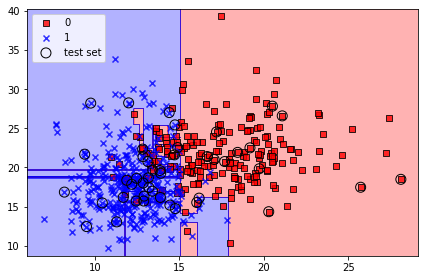


TRAIN Score: 0.9874371859296482
TEST Score: 0.7719298245614035


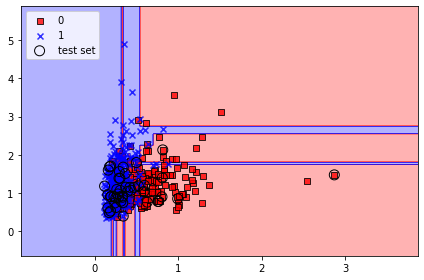


TRAIN Score: 1.0
TEST Score: 0.9005847953216374


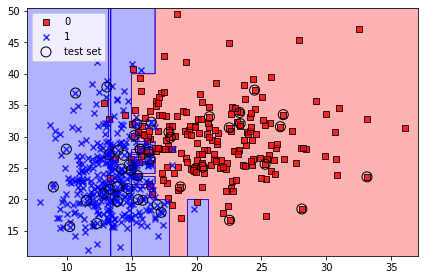

In [37]:
DT(bc.data[:, [0,1]], bc.target, True, 1, [0,1])
DT(bc.data[:, [10,11]], bc.target, True, 2, [10,11])
DT(bc.data[:, [20,21]], bc.target, True, 3, [20,21])

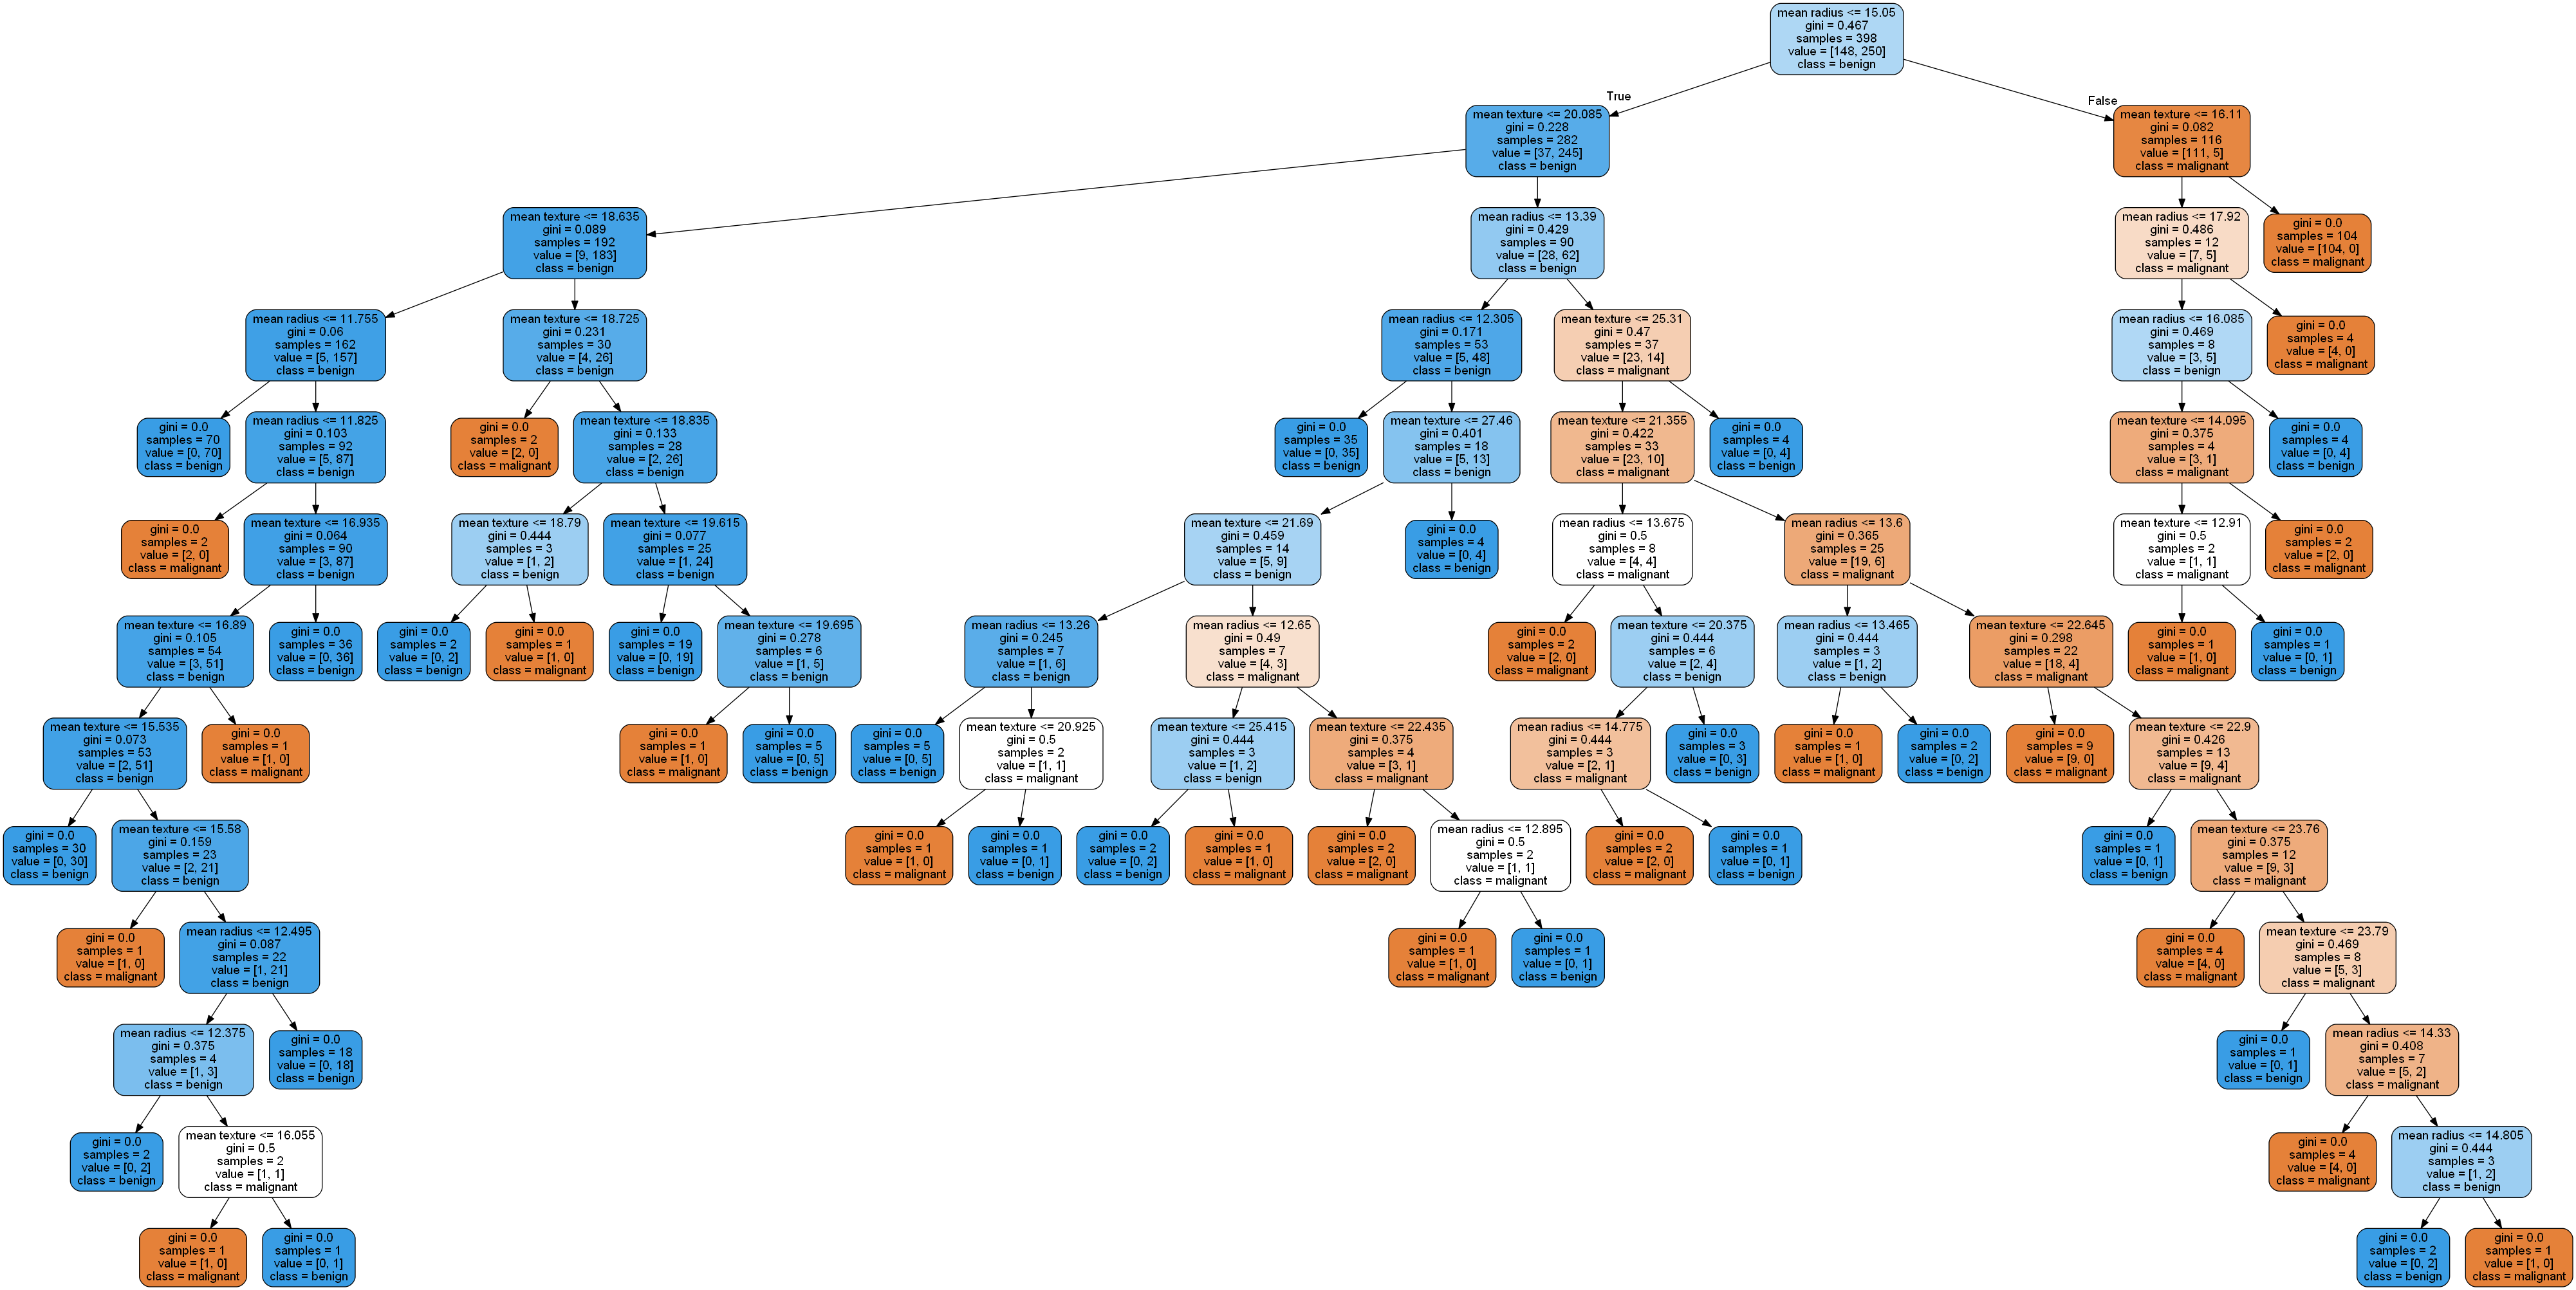

In [38]:
Image("tree1.png")

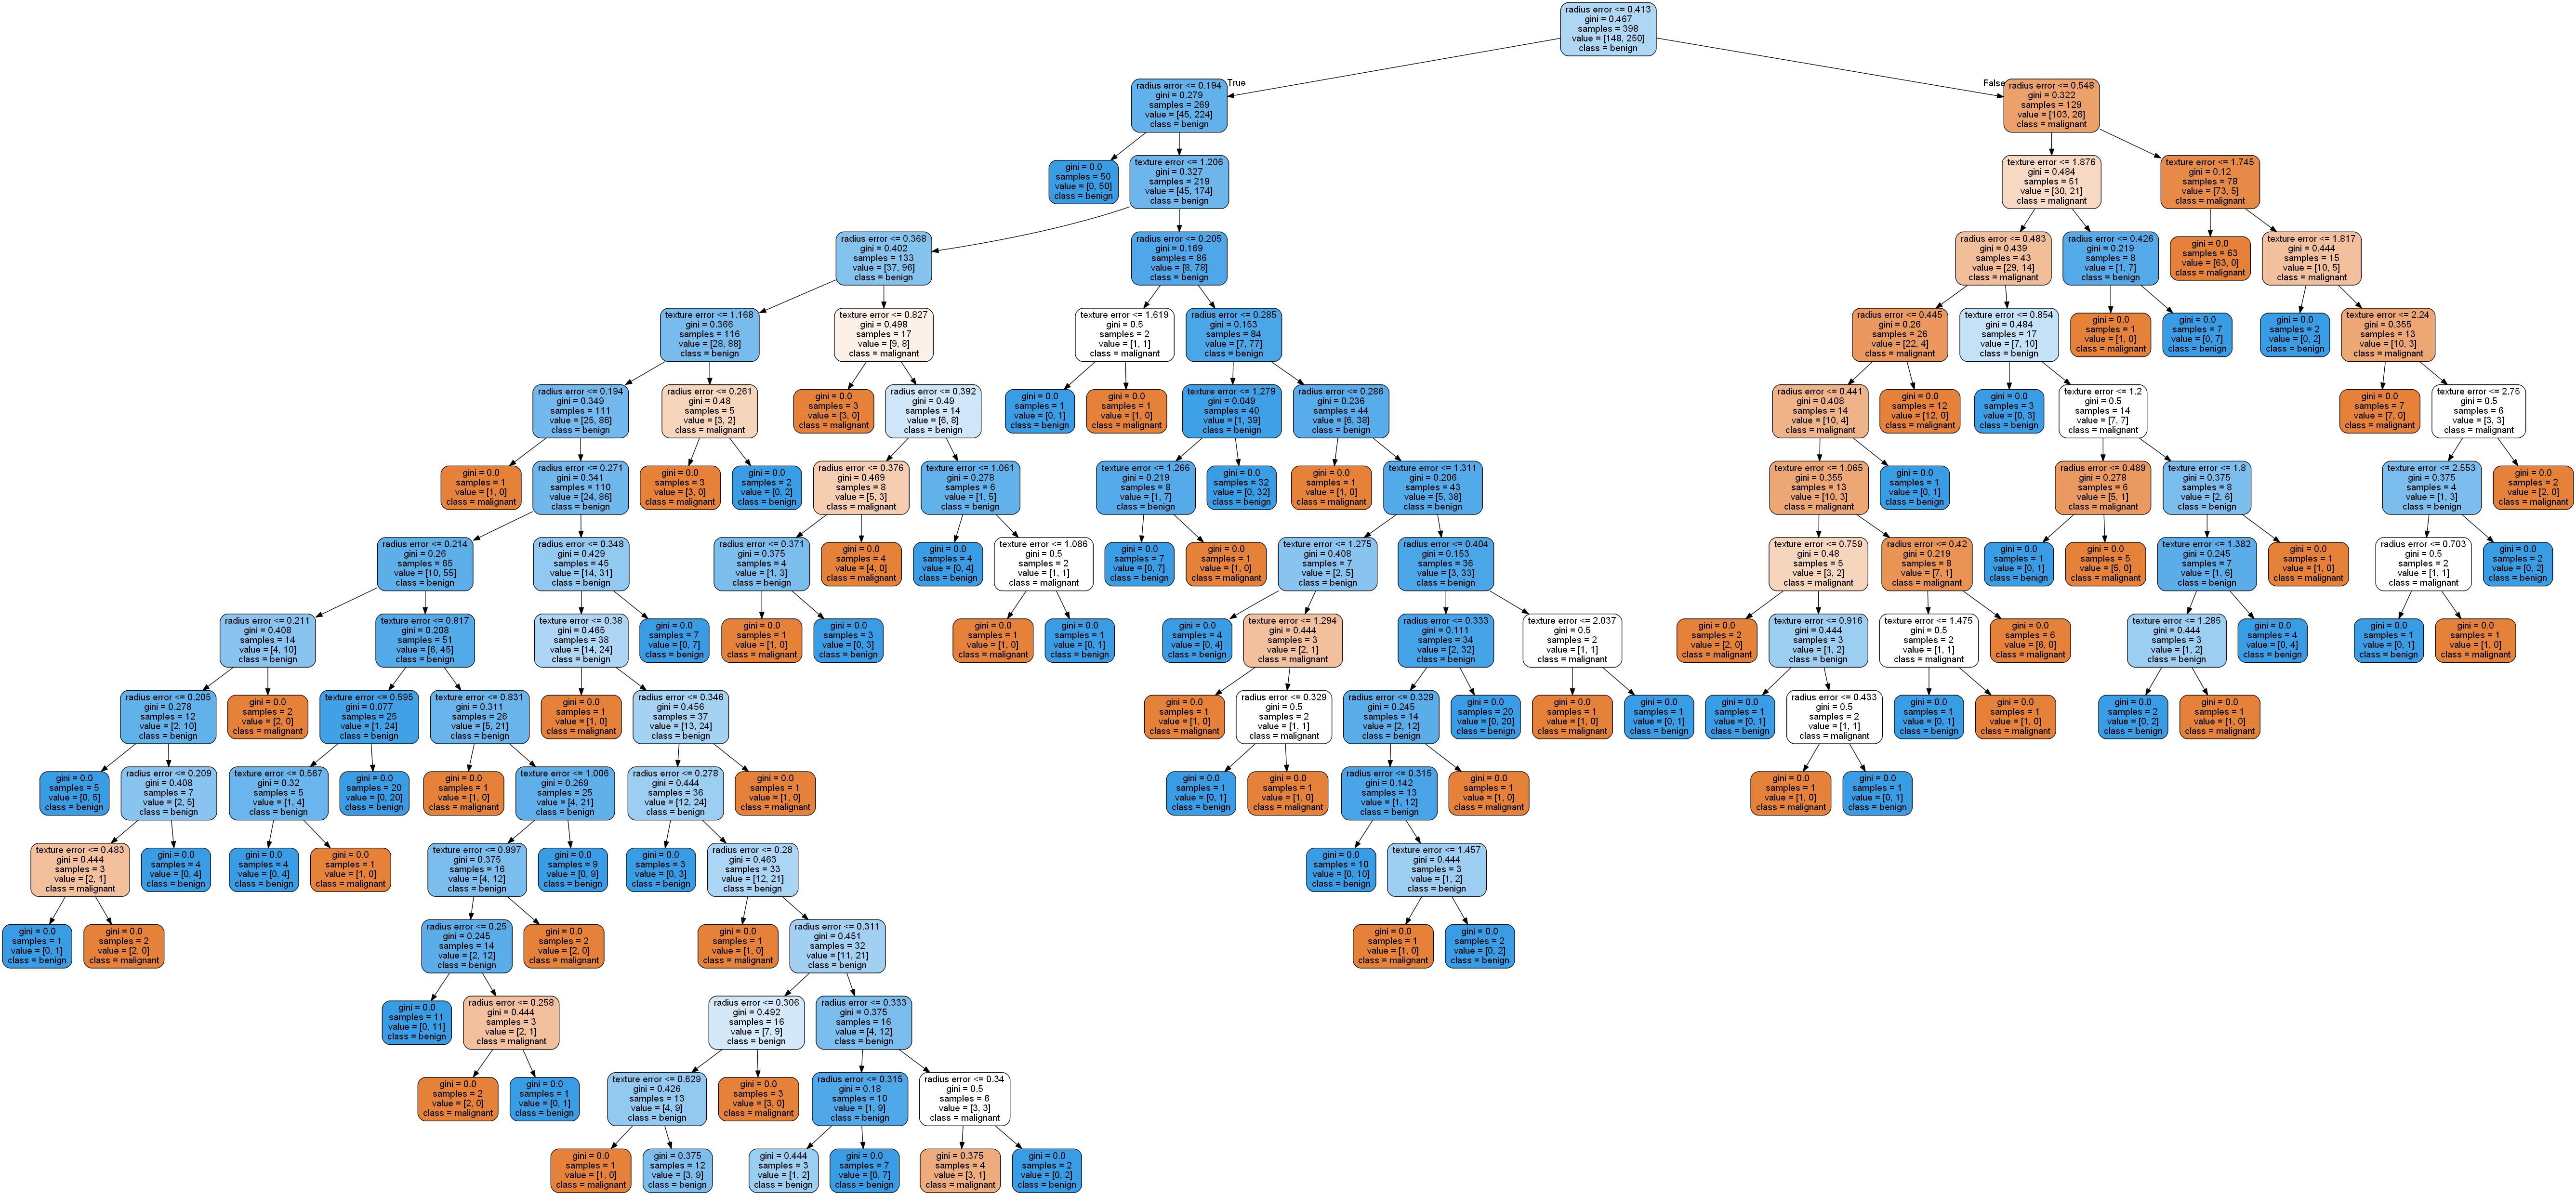

In [39]:
Image("tree2.png")

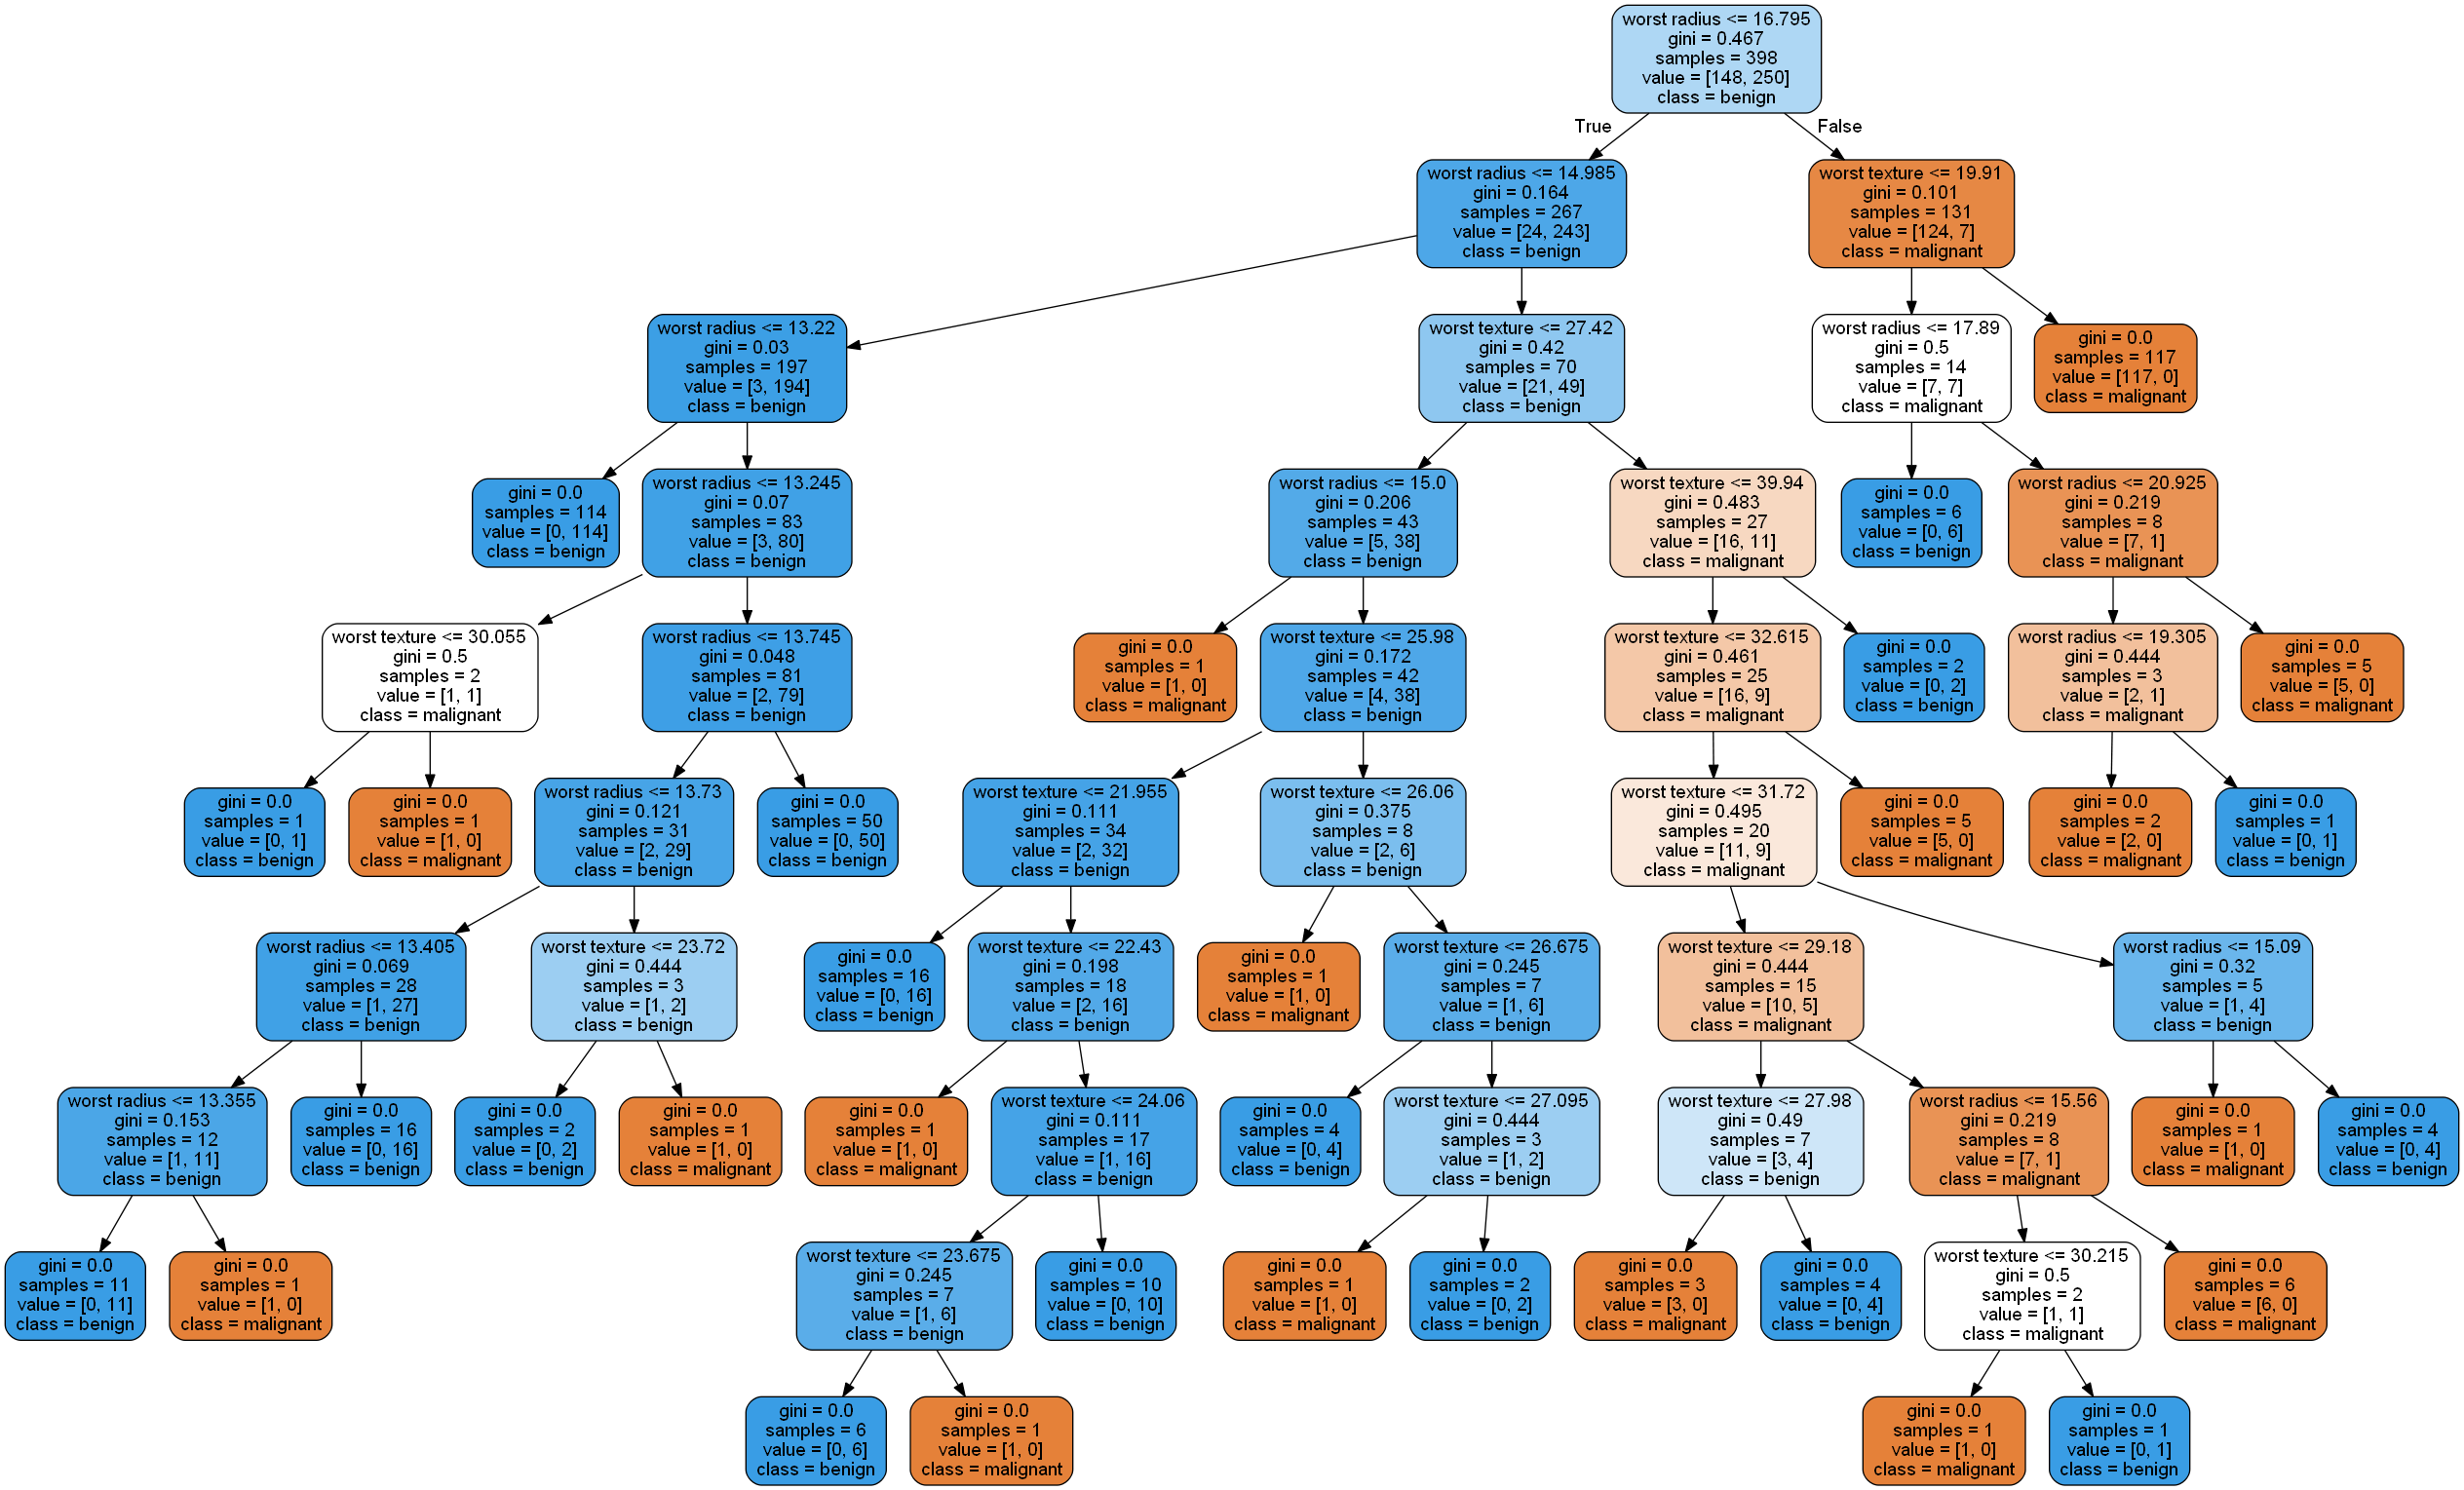

In [40]:
Image("tree3.png")

### K-최근접 이웃: 게으른 학습 알고리즘

### Knn 알고리즘을 적용하여 유방암을 판단하라.
#### 요구사항 
1. 임의의 두 가지 특성을 골라서 암의 종류를 판단하는 Knn을 개발하라.
2. 훈련집합과 테스팅 집합의 비율은 임의로 정하되, 반드시 테스팅 집합의 결과를 출력하라. 
3. 결과는 plot_decision_regions() 함수를 이용하여, 2가지 특성을 x, y 축으로 하여 출력하라. 

In [45]:
from sklearn.neighbors import KNeighborsClassifier

def KNe(X, y, displot=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
    
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    
    knn = KNeighborsClassifier(n_neighbors=7, 
                               p=2, 
                               metric='minkowski')
    knn.fit(X_train_std, y_train)
#     knn.fit(X_train, y_train)
    
    print("TRAIN Score: {}".format(knn.score(X_train, y_train)))
    print("TEST Score: {}".format(knn.score(X_test,y_test)))
    
    X_combined = np.vstack((X_train, X_test))
    y_combined = np.hstack((y_train, y_test))
    
    if displot:
        plot_decision_regions(X_combined, y_combined, 
                              classifier=knn, test_idx=range(105, 150))


        plt.xlabel('')
        plt.ylabel('')
        plt.legend(loc='upper left')
        plt.tight_layout()
        plt.show()
        
    print()

In [46]:
KNe(bc.data[:, [0,1,2]], bc.target)
KNe(bc.data[:, [10,11,12]], bc.target)
KNe(bc.data[:, [20,21,22]], bc.target)

TRAIN Score: 0.37185929648241206
TEST Score: 0.3742690058479532

TRAIN Score: 0.40703517587939697
TEST Score: 0.39766081871345027

TRAIN Score: 0.37185929648241206
TEST Score: 0.3742690058479532



TRAIN Score: 0.37185929648241206
TEST Score: 0.3742690058479532


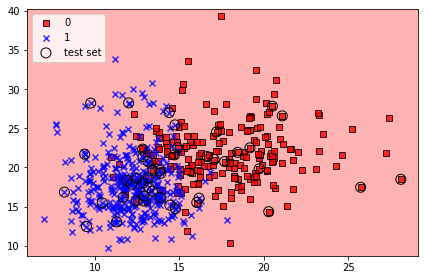


TRAIN Score: 0.5452261306532663
TEST Score: 0.543859649122807


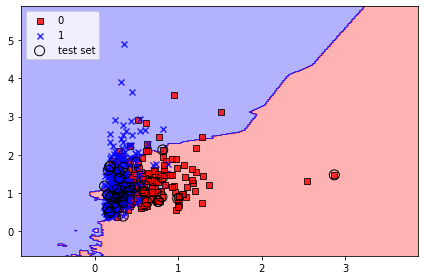


TRAIN Score: 0.37185929648241206
TEST Score: 0.3742690058479532


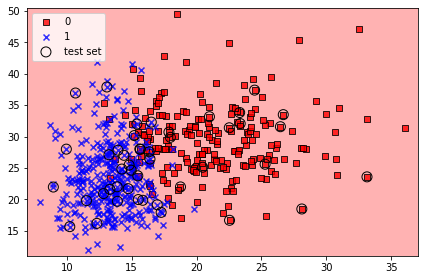

In [47]:
KNe(bc.data[:, [0,1]], bc.target, True)
KNe(bc.data[:, [10,11]], bc.target, True)
KNe(bc.data[:, [20,21]], bc.target, True)